# Fourier transforms tutorial
*developed by Pauline Arriaga*

A Fourier transform is a way of converting between looking at a signal in time vs some quantity to frequency vs some quantity. Let's look at what this looks like for some signals. We will be using the scipy fft function. Let's say that we have some mechanism that outputs a signal that's shaped like a sin wave. In our lab we will be using an Arduino to produce a sound wave such that the intensity of the sound as a function of time is a sin wave. Our output signal will then be:

$signal = A * sin(\omega t) = A sin(2\pi f t)$

For the following, let's assume that f = sound_frequency = 440 Hz and A = 4. Let's measure the sound for t = 0 to 2 seconds

Our laptop speakers will be taking measurements of the sound volume at a rate of sampling_rate = 44100Hz meaning that it will take a signal every $\frac{1}{44100}$ seconds, defined below as time_between_samples.

Note that we declare all of our variables at the top of the code, which makes it easy to re-run our code if we make any changes. Let's first plot what the intensity looks like as a function of time. Take some time to understand the code below and ask a TA if there is anything you don't understand

Text(0, 0.5, 'Intensity')

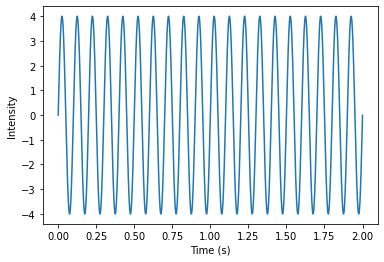

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft

# Generate our variables
sound_frequency = 10.  # Frequency in Hz of the sound
a = 4. # Amplitude of our sound in arbitrary units
sampling_rate = 44100. # Sampling rate in Hz
time_between_samples = 1. / sampling_rate # Interval between samples
length_of_sample = 2. # We are measuring the sound for 2 seconds
number_of_samples = sampling_rate * length_of_sample # Total number of samples

# Generate an array with 44100 * 2 seconds with spacing of time_between_samples seconds
time = np.arange(number_of_samples) * length_of_sample / number_of_samples

measured_signal = a * np.sin(2. * np.pi * sound_frequency * time)

plt.plot(time, measured_signal)
plt.xlabel('Time (s)')
plt.ylabel('Intensity')

Now, let's see what the Fourier transform looks like. The maximum frequency that the signal above can measure is sampling_rate. You can convince yourself of this by imagining what a signal with sound_frequency = sampling_rate would look like. 

Text(0, 0.5, 'Intensity')

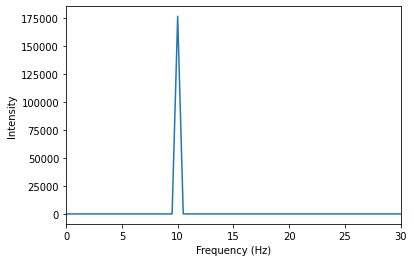

In [ ]:
# We create an array that goes from 0 to the sampling_rate
frequencies = np.arange(number_of_samples) * sampling_rate / number_of_samples # Hz
fourier_intensity = np.fft.fft(measured_signal)

# The fourier transform has a real and imaginary part. We only want to look at the real part. 
plt.plot(frequencies, np.abs(fourier_intensity))


#Let's focus on just the earlier frequencies
plt.xlim([0,30])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity')

As you can see from the Fourier plot, all of the intensity is now focused on a frequency of 10 Hz, the frequency of the sin wave.

We can use the np.where function to find the position where the peak is. The where function will return the indices of the array where some condition is true. The peak is the location where the data point is the maximum intensity. 

In [ ]:
# Now we only want to use the real part of the fourier transform (ignore the imaginary)
abs_fourier_int = np.abs(fourier_intensity)

# Find the maximum value of the Fourier transform
max_value = np.max(abs_fourier_int)

# Find the index where the max location is
max_location = np.where(abs_fourier_int == max_value)[0]

# Now we find the frequency where this happens
peak_location = frequencies[max_location]
print('Signal peak at ' + str(peak_location) + 'Hz')

Signal peak at [1.000e+01 4.409e+04]Hz


Now let's look at a superposition of two sin waves. If we have two speakers each playing a sin wave, then we'll hear two frequencies at once and our microphone will receive both signals. We'll use the same sampling frequency as we did above so we don't have to remake our time and frequency axes. One sin wave will have an intensity A of 4 and a frequency of 10, while the second will have an intensity of 2 and a frequency of 5.

Text(0, 0.5, 'Intensity')

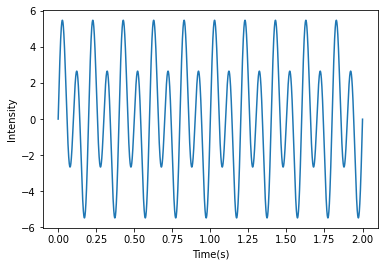

In [ ]:
a1 = 4.
a2 = 2. 

f1 = 10.
f2 = 5.

sin1 = a1 * np.sin(2 * np.pi * f1 * time)
sin2 = a2 * np.sin(2 * np.pi * f2 * time)

superpos_signal = sin1 + sin2

plt.plot(time, superpos_signal)
plt.xlabel('Time(s)')
plt.ylabel('Intensity')

While this signal looks fairly chaotic in the time domain, we can do a Fourier transform to look at the signal in the frequency domain.

Text(0, 0.5, 'Intensity')

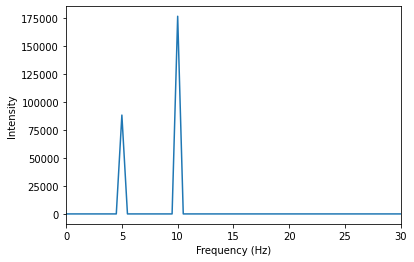

In [ ]:
fourier_intensity = np.fft.fft(superpos_signal)

# The fourier transform has a real and imaginary part. We only want to look at the real part. 
plt.plot(frequencies, np.abs(fourier_intensity))
plt.xlim([0, 30])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity')

What is a chaotic signal in the time domain is now a coherent signal in the frequency domain. We clearly see all of the characteristics of the input parameters. The 5 Hz signal has half of the intensity of the 10 Hz signal

# Fourier Transforms of Sound waves

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

Mounted at drive


We will now use the module wavfile to read in our data. From the example sounds directory, read in the sin_a440_3.wav file. In the wavfile.read command, change the path to the path on your own drive.

In [ ]:
from scipy.io import wavfile

In [ ]:
rate, data = wavfile.read('/content/drive/MyDrive/2021-2022/22Spring/4BL/Reference Files/sin_a440_3.wav')

Now let's look at the intensity as a function of time.

Sampling Rate: 44100


Text(0, 0.5, 'Intensity')

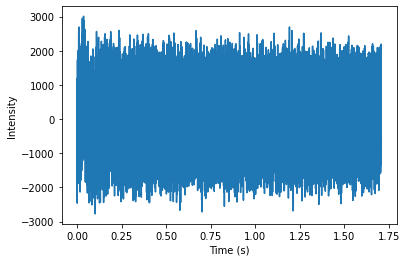

In [ ]:
import matplotlib.pyplot as plt
samp_period = 1. / rate
num_data_points = len(data)
print('Sampling Rate: ' + str(rate))
xaxis = np.arange(len(data)) * samp_period # Make our axis go from 0 to the length of our recording
plt.plot(xaxis, data)
plt.xlabel('Time (s)')
plt.ylabel('Intensity')

Again, the data is very chaotic in the time domain, but we can look at the frequency domain. In these labs, all of the signals we'll need will be somewhere from 0 to 1000. Set the x lmits to make it easier to see the signal. Even though it is difficult to make out features from the time vs intensity plot because of all of the background noise, we can clearly see what frequency the pitch of the recording is.

(400.0, 700.0)

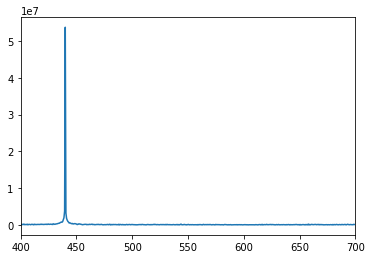

In [ ]:
from scipy.fftpack import fft
import numpy as np
fft_out = fft(data)

# Create an array that goes from 0 to the 44100 Hz
frequencies = np.linspace(0,1,num_data_points) * rate
plt.plot(frequencies,np.abs(fft_out))
plt.xlim([400, 700])

# FFT of a Square Wave

Run the following code block to produce a square wave signal.  Once you have that signal, we will perform an FFT on it 

In [ ]:
# Import packages
from scipy.fftpack import fft
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Define time with a sampling rate of 10,000 Hz 
tstart = -1
tstop = 1
sample_time = 0.0001
t = np.arange(tstart, tstop, sample_time)


#define a 50 Hz squarewave
squareWave = signal.square(2 * np.pi * 50 * t)

Run the following code block to see we have made many periods of a 50 Hz Square wave. We will need a large chunk of data (many periods) to produce a good clean FFT.

(-1.0, 1.0)

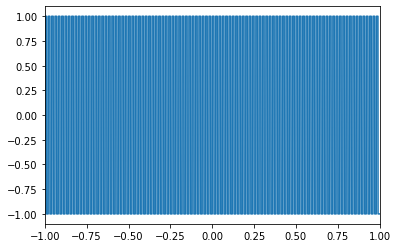

In [ ]:
#plot the wave
plt.plot(t, squareWave)
plt.xlim(-1, 1)

Run the following code block to zoom in on the x-axis and note that we do indeed have a 50 Hz square wave.

(-0.0105, 0.0105)

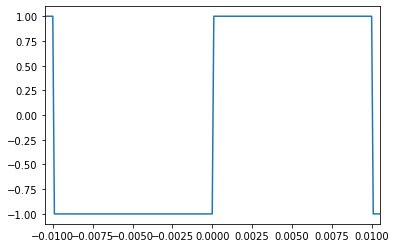

In [ ]:
#plot the wave
plt.plot(t, squareWave)
plt.xlim(-0.0105, 0.0105)

Next fill in the code below to complete your FFT.  Where is the first spike?  Does it make sense given the results of your forier series of a square wave?

Text(0, 0.5, 'Intensity')

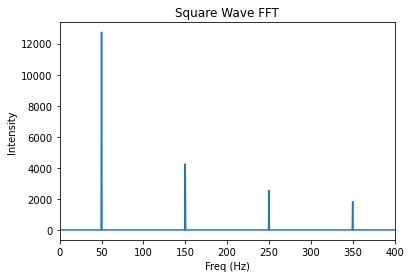

In [ ]:
#Setup and Run the fft
num_data_points_SW = 20000
rate_SW =  10000
fft_squareWave = np.fft.fft(squareWave)



# Create a frequency array that goes from 0 to the 10,000 Hz
frequencies_SW = np.arange(num_data_points_SW) * rate_SW / num_data_points_SW


#Plot the FFT
plt.plot(frequencies_SW,np.abs(fft_squareWave))

# Plot Settings
plt.xlim(0, 400) #Shows from 0 to 400 Hz
plt.title("Square Wave FFT")
plt.xlabel("Freq (Hz)")
plt.ylabel("Intensity")  


Yes, the spikes on the FFT make sense because they are in odd multiples of 50Hz—also, the amplitudes are proportionally decreasing as frequency increases. This matches the fourier function for the sine-to-square wave that involves summating the odd-integer terms of a sinusoidal function.